In [1]:
import sys
sys.path.append("../")  # look one directory up for qca modules, TODO: make a package
from copy import copy
from qca import QCA
from states import make_state
from mpl_toolkits import mplot3d
from matplotlib import cm
from scipy.optimize import curve_fit
from os import makedirs
import matplotlib.pyplot as plt
import measures as ms
import numpy as np
%matplotlib inline

In [2]:
der = "/home/lhillber/documents/research/cellular_automata/qeca/qca/data"
params_template = dict(
              L=11,
              T=1000.0,
              dt=1.0,
              R=6,
              r=1,
              V="H",
              BC="1-00",
              IC="c1_f0",
              E=0.0068,
              N=1000,
              totalistic=False,
              hamiltonian=False,
              trotter=True,
              symmetric=False)

In [3]:
def exponential_fit(x, y):
    m, b = np.polyfit(x, np.log(y), deg=1)
    def func(x):
        return np.exp(b + m*x)
    return m, b, func

In [4]:
params1 = copy(params_template)
params2 = copy(params_template)
params2.update({"E":0.0, "N":1})
Q1 = QCA(params1, der=der)
Q2 = QCA(params2, der=der)
F = np.array([ms.get_bitstring_fidelity(p, q) for p, q in zip(Q1.bitstring, Q2.bitstring)])

In [5]:
C = 1 - (Q2.C(2)[1:]-Q1.C(2)[1:])/Q2.C(2)[1:]
Y = 1 - (Q2.Y(2)[1:]-Q1.Y(2)[1:])/Q2.Y(2)[1:]
t = Q1.ts[1:]

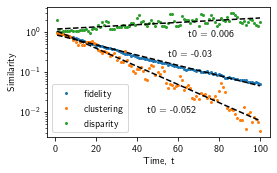

In [9]:
fig, ax = plt.subplots(1,1, figsize=(4, 2.4))
tmax=100
x = t[:tmax]
yF = F[:tmax]
yC = C[:tmax]
yY = Y[:tmax]
mF, bF, funcF = exponential_fit(x, yF)
mC, bC, funcC = exponential_fit(x, yC)
mY, bY, funcY = exponential_fit(x, yY)
ax.plot(x, yF, marker="o", ms=2, ls="none", label="fidelity")
ax.plot(x, yC, marker="o", ms=2, ls="none", label="clustering")
ax.plot(x, yY, marker="o", ms=2, ls="none", label="disparity")
ax.plot(x, funcF(x), c="k", ls="--")
ax.plot(x, funcC(x), c="k", ls="--")
ax.plot(x, funcY(x), c="k", ls="--")
ax.text(55, 2.5e-1, f"t0 = {np.round(mF,3)}")
ax.text(45, 1e-2, f"t0 = {np.round(mC,3)}")
ax.text(65, .8, f"t0 = {np.round(mY,3)}")
ax.set_ylabel("Similarity")
ax.set_xlabel("Time, t")
ax.set_yscale("log")
ax.legend()
plt.savefig("similarity_fits.pdf", bbox_inches="tight")

<ipython-input-3-1517a17968c2>:2: RuntimeWarning: invalid value encountered in log
  m, b = np.polyfit(x, np.log(y), deg=1)


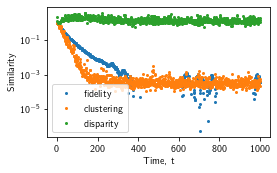

In [8]:
fig, ax = plt.subplots(1,1, figsize=(4, 2.4))
tmax = 1000
x = t[:tmax]
yF = F[:tmax]
yC = C[:tmax]
yY = Y[:tmax]
mF, bF, funcF = exponential_fit(x, yF)
mC, bC, funcC = exponential_fit(x, yC)
mY, bY, funcY = exponential_fit(x, yY)
ax.plot(x, yF, marker="o", ms=2, ls="none", label="fidelity")
ax.plot(x, yC, marker="o", ms=2, ls="none", label="clustering")
ax.plot(x, yY, marker="o", ms=2, ls="none", label="disparity")
ax.set_ylabel("Similarity")
ax.set_xlabel("Time, t")
ax.set_yscale("log")
ax.legend()
plt.savefig("similarity_full-time.pdf", bbox_inches="tight")